In [ ]:
!mkdir -p data

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/heart_raw.csv')

# Display first few rows
print("🔍 Preview of the data:")
display(df.head())

# Get basic info (data types, nulls)
print("\n📊 Dataset Info:")
df.info()

# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\n📏 Summary Statistics:")
display(df.describe())

🔍 Preview of the data:


,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
0,78,Male,82,171,108,206,0,0,0,Normal,138,0
1,68,Male,90,132,72,294,1,1,0,Normal,176,1
2,54,Male,89,118,114,261,0,0,0,ST,188,0
3,82,Female,94,121,82,196,0,0,0,ST,122,0
4,47,Male,66,110,119,234,1,1,0,LVH,120,0



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         150 non-null    int64 
 1   Gender                      150 non-null    object
 2   RestingHeartRate            150 non-null    int64 
 3   SystolicBP                  150 non-null    int64 
 4   DiastolicBP                 150 non-null    int64 
 5   Cholesterol                 150 non-null    int64 
 6   HasDiabetes                 150 non-null    int64 
 7   IsSmoker                    150 non-null    int64 
 8   HasHistoryOfCardiacEvent    150 non-null    int64 
 9   ECGType                     150 non-null    object
 10  MaxHeartRateDuringActivity  150 non-null    int64 
 11  RiskOfUpcomingCardiacEvent  150 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 14.2+ KB

❓ Missing Values:
Age                    

,Age,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,62.460000,81.380000,143.340000,93.920000,222.206667,0.326667,0.320000,0.260000,159.513333,0.233333
std,13.389683,11.252245,20.437769,14.880968,42.797839,0.470565,0.468039,0.440104,23.955142,0.424370
min,40.000000,60.000000,110.000000,70.000000,150.000000,0.000000,0.000000,0.000000,120.000000,0.000000
25%,51.000000,73.250000,125.000000,81.000000,183.500000,0.000000,0.000000,0.000000,138.000000,0.000000
50%,63.000000,83.000000,142.500000,95.000000,222.500000,0.000000,0.000000,0.000000,160.000000,0.000000
75%,74.000000,91.000000,161.000000,106.000000,260.000000,1.000000,1.000000,1.000000,180.000000,0.000000
max,84.000000,99.000000,179.000000,119.000000,299.000000,1.000000,1.000000,1.000000,199.000000,1.000000


In [ ]:
df.to_csv('heart_raw.csv', index=False)

# Download the raw CSV to your computer
from google.colab import files
files.download('heart_raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
0,1.164483,1,0.055285,1.357911,0.949345,-0.379948,0,0,0,1,-0.901076,0
1,0.415137,1,0.768636,-0.556714,-1.477957,1.683119,1,1,0,1,0.690536,1
2,-0.633946,1,0.679467,-1.244015,1.353895,0.909469,0,0,0,2,1.193151,0
3,1.464221,0,1.125311,-1.096736,-0.803707,-0.614388,0,0,0,2,-1.571229,0
4,-1.158488,1,-1.371417,-1.636758,1.691020,0.276482,1,1,0,0,-1.654998,0


In [ ]:
cols_with_zero_issues = ['RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol']
for col in cols_with_zero_issues:
    print(f"{col}: {df[col].isin([0]).sum()} zero(s)")

RestingHeartRate: 0 zero(s)
SystolicBP: 0 zero(s)
DiastolicBP: 0 zero(s)
Cholesterol: 0 zero(s)


In [ ]:
#Replaing the
df[cols_with_zero_issues] = df[cols_with_zero_issues].replace(0, np.nan)

In [ ]:
for col in cols_with_zero_issues:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"{col} missing values filled with median: {median_value}")

RestingHeartRate missing values filled with median: 83.0
SystolicBP missing values filled with median: 142.5
DiastolicBP missing values filled with median: 95.0
Cholesterol missing values filled with median: 222.5


/tmp/ipython-input-6-212261517.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode Gender (Male=1, Female=0)
df['Gender'] = le.fit_transform(df['Gender'])

# Encode ECGType (Normal, LVH, ST → 0, 1, 2)
df['ECGType'] = le.fit_transform(df['ECGType'])

# Verify encoding
print("\n🔁 Encoded Columns Preview:")
display(df[['Gender', 'ECGType']].head())



🔁 Encoded Columns Preview:


,Gender,ECGType
0,1,1
1,1,1
2,1,2
3,0,2
4,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = [
    'Age', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP',
    'Cholesterol', 'MaxHeartRateDuringActivity'
]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Check result
print("✅ Scaled Feature Preview:")
display(df[scale_cols].head())

✅ Scaled Feature Preview:


,Age,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,MaxHeartRateDuringActivity
0,1.164483,0.055285,1.357911,0.949345,-0.379948,-0.901076
1,0.415137,0.768636,-0.556714,-1.477957,1.683119,0.690536
2,-0.633946,0.679467,-1.244015,1.353895,0.909469,1.193151
3,1.464221,1.125311,-1.096736,-0.803707,-0.614388,-1.571229
4,-1.158488,-1.371417,-1.636758,1.691020,0.276482,-1.654998


/tmp/ipython-input-9-1881933264.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


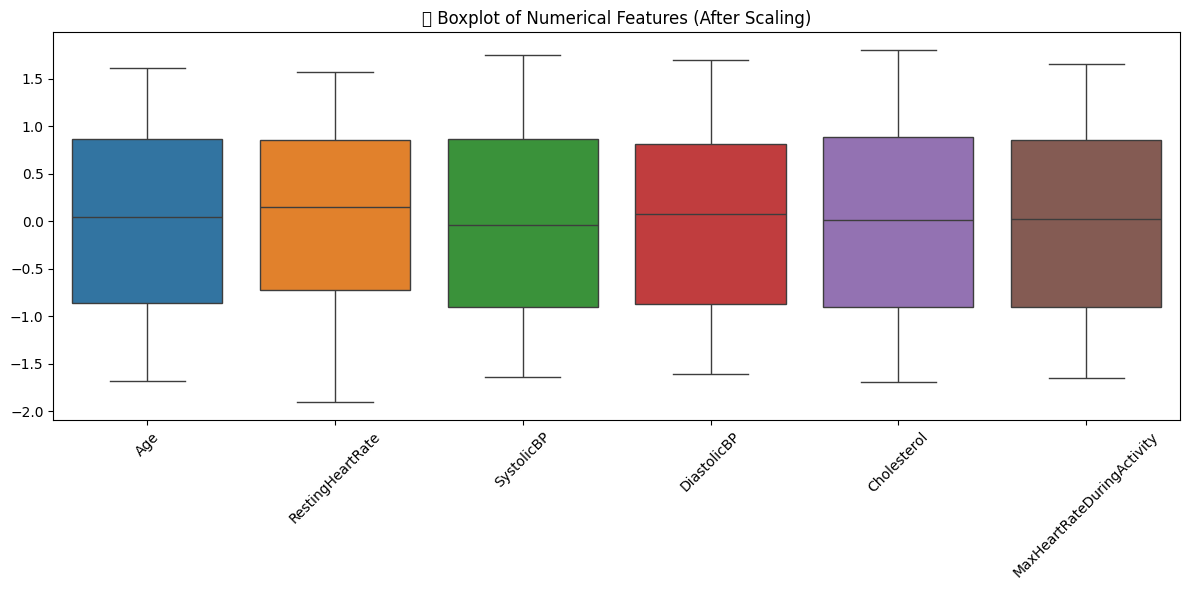

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for scaled numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'MaxHeartRateDuringActivity']])
plt.title("📦 Boxplot of Numerical Features (After Scaling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for all numerical features
z_scores = np.abs(zscore(df[[
    'Age', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP',
    'Cholesterol', 'MaxHeartRateDuringActivity'
]]))

# Keep only rows where all z-scores < 3
df_cleaned = df[(z_scores < 3).all(axis=1)]

# Show the reduction
print(f"🧾 Original rows: {df.shape[0]}")
print(f"✅ Rows after outlier removal: {df_cleaned.shape[0]}")

🧾 Original rows: 150
✅ Rows after outlier removal: 150


In [ ]:
df_cleaned.to_csv("data/heart_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as: data/heart_cleaned.csv")

✅ Cleaned dataset saved as: data/heart_cleaned.csv


In [ ]:
df.head()

,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
0,1.164483,1,0.055285,1.357911,0.949345,-0.379948,0,0,0,1,-0.901076,0
1,0.415137,1,0.768636,-0.556714,-1.477957,1.683119,1,1,0,1,0.690536,1
2,-0.633946,1,0.679467,-1.244015,1.353895,0.909469,0,0,0,2,1.193151,0
3,1.464221,0,1.125311,-1.096736,-0.803707,-0.614388,0,0,0,2,-1.571229,0
4,-1.158488,1,-1.371417,-1.636758,1.691020,0.276482,1,1,0,0,-1.654998,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         150 non-null    float64
 1   Gender                      150 non-null    int64  
 2   RestingHeartRate            150 non-null    float64
 3   SystolicBP                  150 non-null    float64
 4   DiastolicBP                 150 non-null    float64
 5   Cholesterol                 150 non-null    float64
 6   HasDiabetes                 150 non-null    int64  
 7   IsSmoker                    150 non-null    int64  
 8   HasHistoryOfCardiacEvent    150 non-null    int64  
 9   ECGType                     150 non-null    int64  
 10  MaxHeartRateDuringActivity  150 non-null    float64
 11  RiskOfUpcomingCardiacEvent  150 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 14.2 KB


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
RestingHeartRate,0
SystolicBP,0
DiastolicBP,0
Cholesterol,0
HasDiabetes,0
IsSmoker,0
HasHistoryOfCardiacEvent,0
ECGType,0


In [ ]:
df.describe()

,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,-7.993606e-17,0.493333,4.115227e-16,-1.421085e-16,-1.095420e-16,-2.723747e-16,0.326667,0.320000,0.260000,1.026667,4.914587e-16,0.233333
std,1.003350e+00,0.501630,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.470565,0.468039,0.440104,0.818795,1.003350e+00,0.424370
min,-1.683030e+00,0.000000,-1.906431e+00,-1.636758e+00,-1.612807e+00,-1.692809e+00,0.000000,0.000000,0.000000,0.000000,-1.654998e+00,0.000000
25%,-8.587501e-01,0.000000,-7.249430e-01,-9.003644e-01,-8.711317e-01,-9.074369e-01,0.000000,0.000000,0.000000,0.000000,-9.010761e-01,0.000000
50%,4.046466e-02,0.000000,1.444536e-01,-4.123807e-02,7.281906e-02,6.876890e-03,0.000000,0.000000,0.000000,1.000000,2.038381e-02,0.000000
75%,8.647449e-01,1.000000,8.578046e-01,8.669812e-01,8.144946e-01,8.860248e-01,1.000000,1.000000,1.000000,2.000000,8.580746e-01,0.000000
max,1.614091e+00,1.000000,1.571156e+00,1.750654e+00,1.691020e+00,1.800339e+00,1.000000,1.000000,1.000000,2.000000,1.653881e+00,1.000000


In [ ]:
import pandas as pd
df = pd.read_csv("heart_raw.csv")

In [ ]:
cols_with_zero_issues = ['RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholestrol']

for col in cols_with_zero_issues:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        print(f"{col}: {zero_count} zero(s)")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


RestingHeartRate: 0 zero(s)
SystolicBP: 0 zero(s)
DiastolicBP: 0 zero(s)
Column 'Cholestrol' not found in the DataFrame.


In [ ]:
for col in cols_with_zero_issues:
    if col in df.columns:
        median_val = df[col][df[col] != 0].median()
        df[col] = df[col].replace(0, median_val)


In [ ]:
print(df.columns.tolist())


['Age', 'Gender', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent', 'ECGType_Normal', 'ECGType_ST']


In [ ]:
cols_to_encode = ['Sex', 'ECGType']


In [ ]:
cols_to_encode = ['Gender', 'ECG']  # use real names from above output


In [ ]:
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


KeyError: "['ECG'] not in index"

In [ ]:
print(df.columns.tolist())


['Age', 'Gender', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent', 'ECGType_Normal', 'ECGType_ST']


In [ ]:
cols_to_encode = ['Gender', 'ECG Type']  # or whatever is printed


In [ ]:
print(df.columns.tolist())


['Age', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent', 'ECGType_Normal', 'ECGType_ST', 'Gender_Male']


In [ ]:
df.columns.tolist()

['Age',
 'RestingHeartRate',
 'SystolicBP',
 'DiastolicBP',
 'Cholesterol',
 'HasDiabetes',
 'IsSmoker',
 'HasHistoryOfCardiacEvent',
 'MaxHeartRateDuringActivity',
 'RiskOfUpcomingCardiacEvent',
 'ECGType_Normal',
 'ECGType_ST',
 'Gender_Male']

In [ ]:
print(df.columns)


Index(['Age', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol',
       'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent',
       'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent',
       'ECGType_Normal', 'ECGType_ST', 'Gender_Male'],
      dtype='object')


In [ ]:
df2 = pd.read_csv("heart_cleaning.csv", on_bad_lines='skip')


In [ ]:
import pandas as pd
df = pd.read_csv('heart_cleaned.csv')  # or the saved cleaned file
df.head()


,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
0,1.164483,1,0.055285,1.357911,0.949345,-0.379948,0,0,0,1,-0.901076,0
1,0.415137,1,0.768636,-0.556714,-1.477957,1.683119,1,1,0,1,0.690536,1
2,-0.633946,1,0.679467,-1.244015,1.353895,0.909469,0,0,0,2,1.193151,0
3,1.464221,0,1.125311,-1.096736,-0.803707,-0.614388,0,0,0,2,-1.571229,0
4,-1.158488,1,-1.371417,-1.636758,1.691020,0.276482,1,1,0,0,-1.654998,0


In [ ]:
# Check structure, datatypes, nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         150 non-null    float64
 1   Gender                      150 non-null    int64  
 2   RestingHeartRate            150 non-null    float64
 3   SystolicBP                  150 non-null    float64
 4   DiastolicBP                 150 non-null    float64
 5   Cholesterol                 150 non-null    float64
 6   HasDiabetes                 150 non-null    int64  
 7   IsSmoker                    150 non-null    int64  
 8   HasHistoryOfCardiacEvent    150 non-null    int64  
 9   ECGType                     150 non-null    int64  
 10  MaxHeartRateDuringActivity  150 non-null    float64
 11  RiskOfUpcomingCardiacEvent  150 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 14.2 KB


In [ ]:
# Descriptive stat
df.describe()


,Age,Gender,RestingHeartRate,SystolicBP,DiastolicBP,Cholesterol,HasDiabetes,IsSmoker,HasHistoryOfCardiacEvent,ECGType,MaxHeartRateDuringActivity,RiskOfUpcomingCardiacEvent
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,-6.513308e-17,0.493333,4.115227e-16,-1.509903e-16,-9.473903e-17,-2.664535e-16,0.326667,0.320000,0.260000,1.026667,4.914587e-16,0.233333
std,1.003350e+00,0.501630,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.470565,0.468039,0.440104,0.818795,1.003350e+00,0.424370
min,-1.683030e+00,0.000000,-1.906431e+00,-1.636758e+00,-1.612807e+00,-1.692809e+00,0.000000,0.000000,0.000000,0.000000,-1.654998e+00,0.000000
25%,-8.587501e-01,0.000000,-7.249430e-01,-9.003644e-01,-8.711317e-01,-9.074369e-01,0.000000,0.000000,0.000000,0.000000,-9.010761e-01,0.000000
50%,4.046466e-02,0.000000,1.444536e-01,-4.123807e-02,7.281906e-02,6.876890e-03,0.000000,0.000000,0.000000,1.000000,2.038381e-02,0.000000
75%,8.647449e-01,1.000000,8.578046e-01,8.669812e-01,8.144946e-01,8.860248e-01,1.000000,1.000000,1.000000,2.000000,8.580746e-01,0.000000
max,1.614091e+00,1.000000,1.571156e+00,1.750654e+00,1.691020e+00,1.800339e+00,1.000000,1.000000,1.000000,2.000000,1.653881e+00,1.000000


In [ ]:
# Checking for missing values
df.isnull().sum()


,0
Age,0
Gender,0
RestingHeartRate,0
SystolicBP,0
DiastolicBP,0
Cholesterol,0
HasDiabetes,0
IsSmoker,0
HasHistoryOfCardiacEvent,0
ECGType,0


In [ ]:
print(df.columns.tolist())


['Age', 'Gender', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'ECGType', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent']


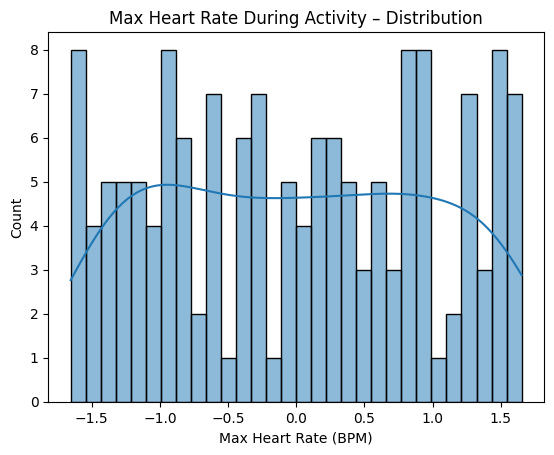

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['MaxHeartRateDuringActivity'], kde=True, bins=30)
plt.title("Max Heart Rate During Activity – Distribution")
plt.xlabel("Max Heart Rate (BPM)")
plt.ylabel("Count")
plt.show()


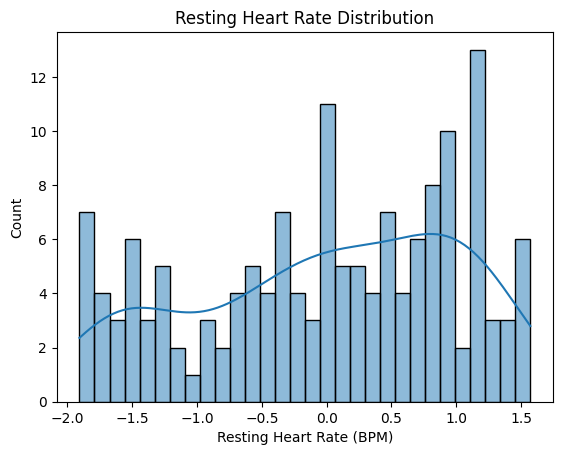

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['RestingHeartRate'], kde=True, bins=30)
plt.title("Resting Heart Rate Distribution")
plt.xlabel("Resting Heart Rate (BPM)")
plt.ylabel("Count")
plt.show()


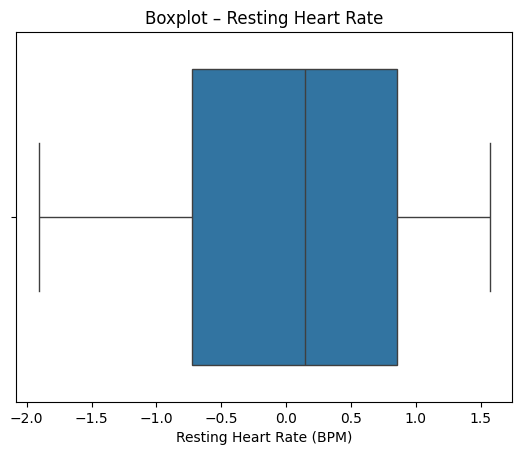

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['RestingHeartRate'])
plt.title("Boxplot – Resting Heart Rate")
plt.xlabel("Resting Heart Rate (BPM)")
plt.show()


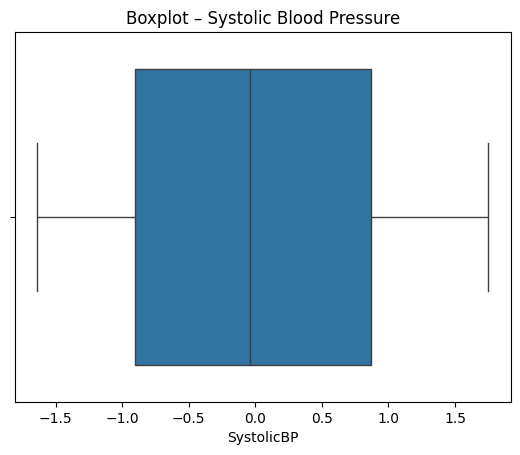

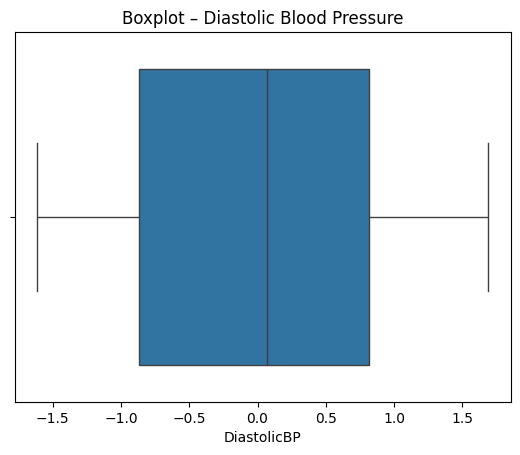

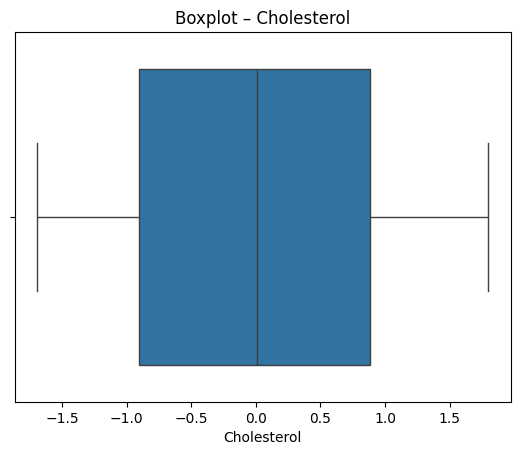

In [ ]:
sns.boxplot(x=df['SystolicBP'])
plt.title("Boxplot – Systolic Blood Pressure")
plt.show()

sns.boxplot(x=df['DiastolicBP'])
plt.title("Boxplot – Diastolic Blood Pressure")
plt.show()

sns.boxplot(x=df['Cholesterol'])
plt.title("Boxplot – Cholesterol")
plt.show()


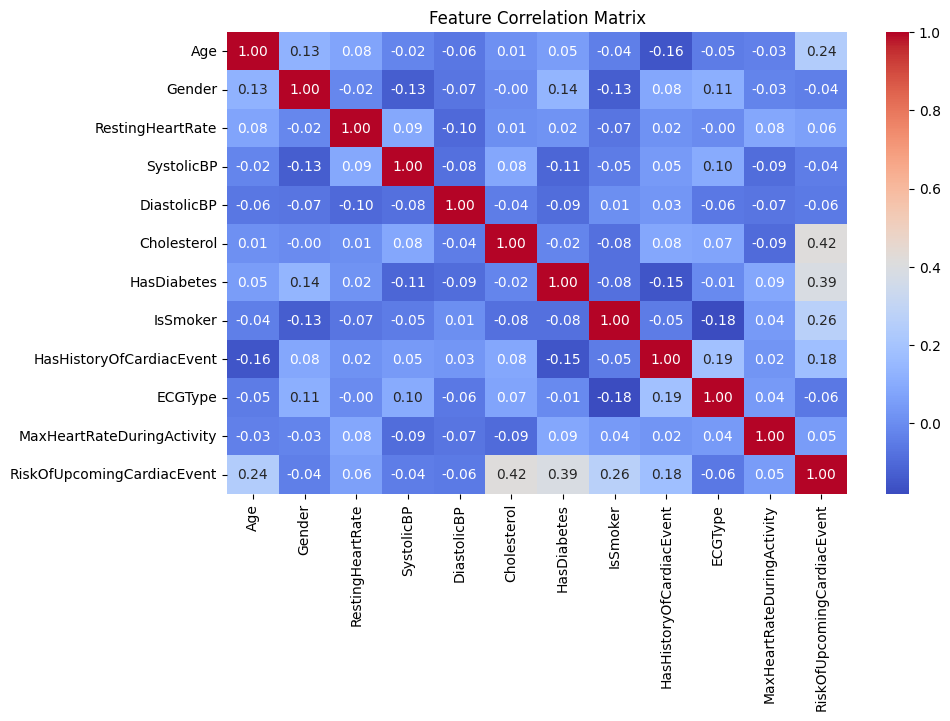

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


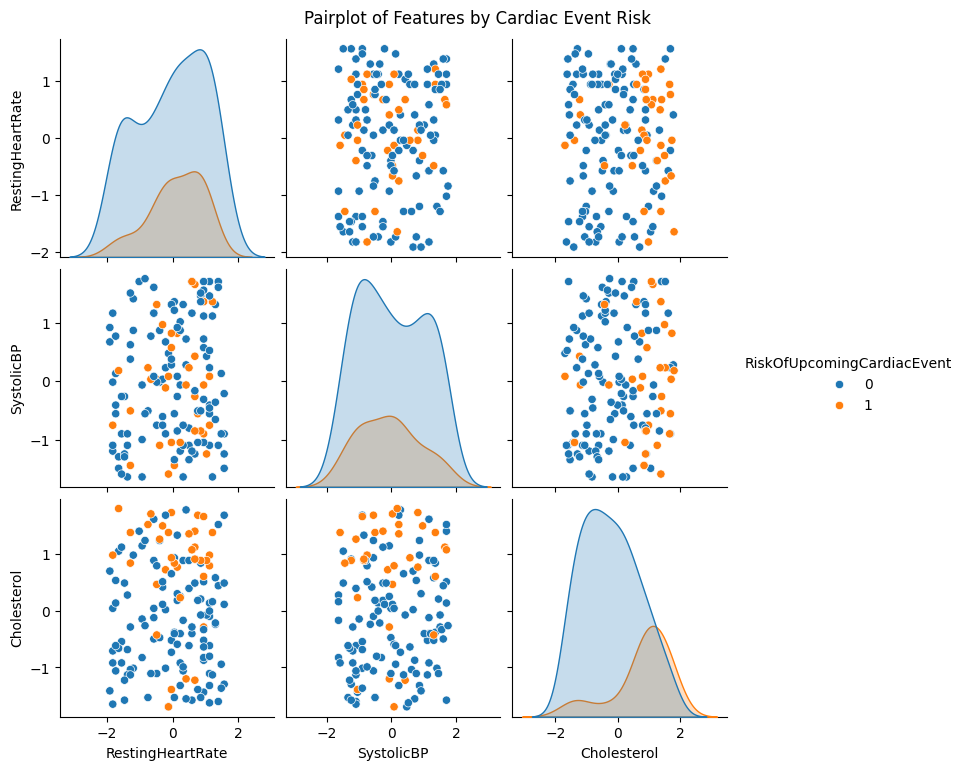

In [ ]:
sns.pairplot(df[['RestingHeartRate', 'SystolicBP', 'Cholesterol', 'RiskOfUpcomingCardiacEvent']],
             hue='RiskOfUpcomingCardiacEvent')
plt.suptitle("Pairplot of Features by Cardiac Event Risk", y=1.02)
plt.show()


In [ ]:
print(df.columns.tolist())


['Age', 'Gender', 'RestingHeartRate', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'HasDiabetes', 'IsSmoker', 'HasHistoryOfCardiacEvent', 'ECGType', 'MaxHeartRateDuringActivity', 'RiskOfUpcomingCardiacEvent']


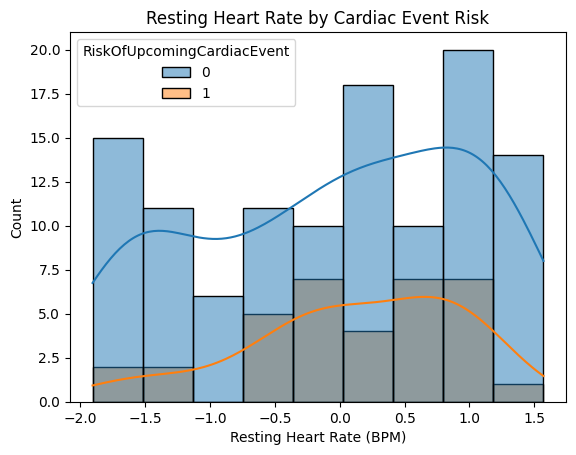

In [ ]:
sns.histplot(data=df, x='RestingHeartRate', hue='RiskOfUpcomingCardiacEvent', kde=True)
plt.title("Resting Heart Rate by Cardiac Event Risk")
plt.xlabel("Resting Heart Rate (BPM)")
plt.ylabel("Count")
plt.show()


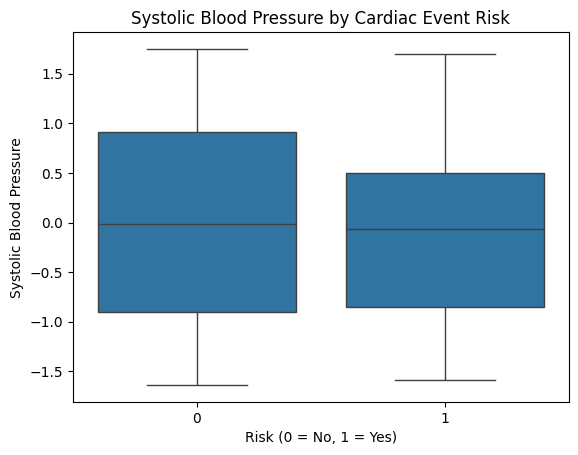

In [ ]:
sns.boxplot(x='RiskOfUpcomingCardiacEvent', y='SystolicBP', data=df)
plt.title("Systolic Blood Pressure by Cardiac Event Risk")
plt.xlabel("Risk (0 = No, 1 = Yes)")
plt.ylabel("Systolic Blood Pressure")
plt.show()


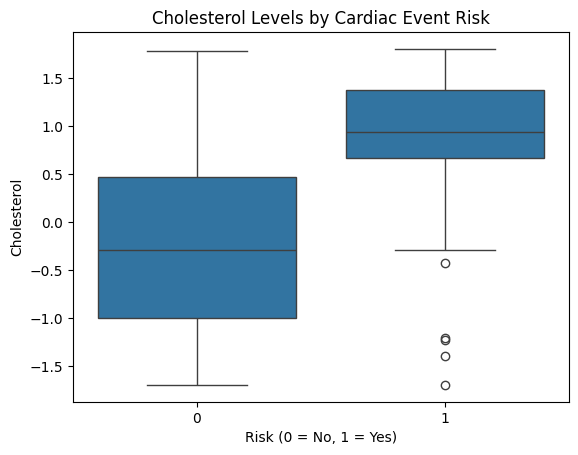

In [ ]:
sns.boxplot(x='RiskOfUpcomingCardiacEvent', y='Cholesterol', data=df)
plt.title("Cholesterol Levels by Cardiac Event Risk")
plt.xlabel("Risk (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df,
    x='RestingHeartRate',
    y='SystolicBP',
    color='RiskOfUpcomingCardiacEvent',
    size=df['Cholesterol'].abs(),  #fixong absolute values
    hover_data=['Age', 'DiastolicBP', 'Gender'],
    title="Heart Rate vs. Systolic BP by Cardiac Risk")
fig.show()
